# Acidentes aéreos no Brasil

## Objetivo

O objetivo da análise abaixo é responder às seguintes perguntas sobre acidentes aéreos no Brasil:
- Em que período do ano ocorrem mais acidentes aéreos?
- Em que período do dia ocorrem mais acidentes aéreos?
- Em quais estados do Brasil ocorrem mais acidentes?
- Como tem sido a evolução do número de casos de acidente aéreo ao longo do anos?
- Normalmente, quantas aeronaves estão envolvidas nos acidentes?
- Quais os tipos mais frequentes de acidentes aéreos?
- Qual o tipo de aeronave que mais se envolve em acidentes?
- Qual o tipo de operação mais frequente entre as aeronaves envolvidas em acidentes desde 2010?
- Quando foram fabricadas as aeronaves que se envolveram em acidentes?
- Como se distribuem as idades das aeronaves envolvidas em acidentes?
- Em que fase de operação estava a aeronave no momento do acidente?
- As aeronaves sofrem muito dano em decorrência dos acidentes?
- Os acidentes de aeronaves resultaram em mortes? Quantas?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Leitura do dataset principal

In [2]:
df0 = pd.read_csv("ocorrencia.csv", sep=';')
print(f"Dataset possui {df0.shape[0]} linhas e {df0.shape[1]} colunas")

Dataset possui 6114 linhas e 22 colunas


### Escolhendo as colunas que serão usadas
Como não usaremos todas as colunas do dataset, vale escolher as que serão utilizadas e deixá-lo mais claro e apresentável

In [3]:
#Verificando se as colunas codigo_ocorrencia trazem a mesma info
for col in [col for col in df0.columns if "codigo" in col]:
    print(col)
    print(df0['codigo_ocorrencia'].equals(df0[col]))

codigo_ocorrencia
True
codigo_ocorrencia1
True
codigo_ocorrencia2
True
codigo_ocorrencia3
True
codigo_ocorrencia4
True


In [4]:
df0 = df0[['codigo_ocorrencia', 'ocorrencia_classificacao', 'ocorrencia_uf',
           'ocorrencia_dia', 'ocorrencia_hora','total_aeronaves_envolvidas']]

Frequência no dataset de cada tipo de ocorrência:
INCIDENTE          55.495584
ACIDENTE           31.566896
INCIDENTE GRAVE    12.937520
Name: ocorrencia_classificacao, dtype: float64


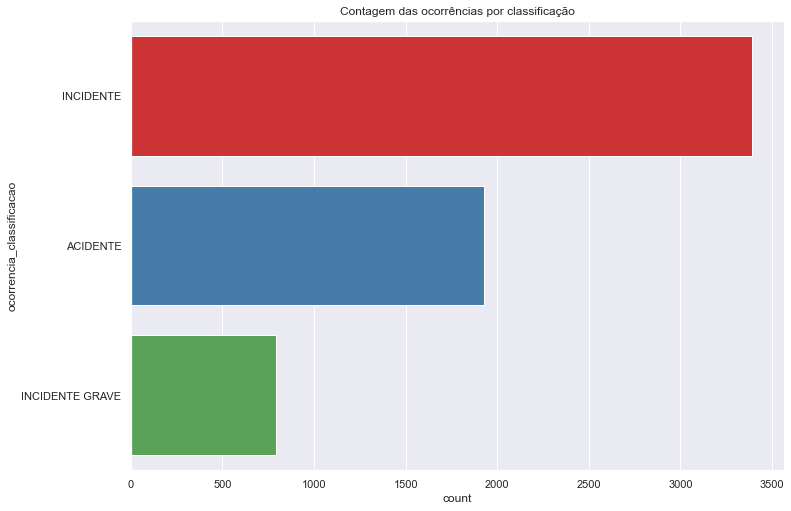

In [5]:
sns.countplot(y = 'ocorrencia_classificacao', data=df0, palette="Set1").set_title("Contagem das ocorrências por classificação")
print("Frequência no dataset de cada tipo de ocorrência:")
print(df0['ocorrencia_classificacao'].value_counts(1)*100)

### Filtrando o dataset para selecionar apenas as ocorrências que se tratam de acidentes

Como o dataset traz diferentes tipos de ocorrências (acidentes, incidentes, incidentes graves) e estamos interessado apenas nos acidentes, temos que filtrá-lo. Como vimos acima, os acidentes reprensentam apenas 31,57% das ocorrências registradas

In [6]:
df1 = df0[df0['ocorrencia_classificacao'] == "ACIDENTE"].copy()
len(df1)

1930

Ao todo, há 1930 acidentes aéreos registrados na base

### Em que período do ano ocorrem mais acidentes aéreos?

Frequência no dataset de acidentes aéreos em cada mês:
01    10.259067
02     9.740933
04     9.481865
03     9.067358
07     8.911917
09     8.497409
12     8.341969
05     8.134715
11     7.720207
10     7.461140
08     6.373057
06     6.010363
Name: ocorrencia_mes, dtype: float64


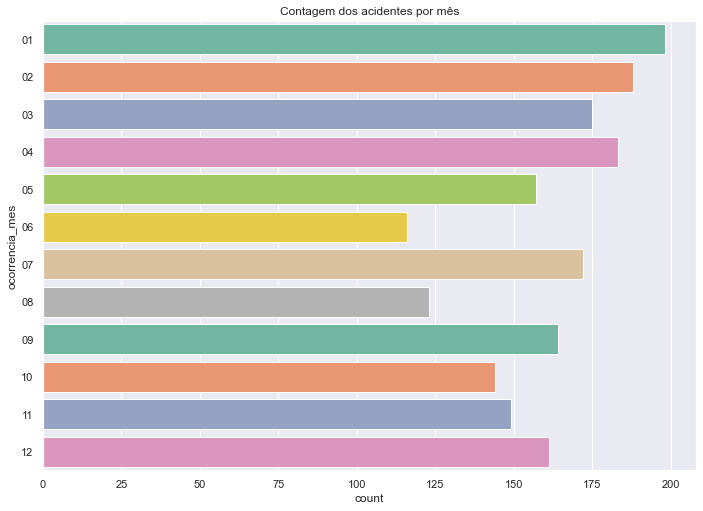

In [7]:
df1["ocorrencia_mes"] = df1['ocorrencia_dia'].apply(lambda x: x[3:5])
sns.countplot(y = 'ocorrencia_mes', data=df1, palette="Set2").set_title("Contagem dos acidentes por mês")
print("Frequência no dataset de acidentes aéreos em cada mês:")
print(df1['ocorrencia_mes'].value_counts(1)*100)

Nota-se que o mês de janeiro é o que mais concentra acidentes, seguido por fevereiro e depois abril. É provável que janeiro concentre a maior parte dos acidentes por ser um mês de férias escolares e próximo ao começo do ano, o que torna as viagens dos brasileiros mais frequentes. Nesse sentido, surpreende que dezembro e julho não venham logo em seguida de janeiro em número de ocorrências. É provável que fevereiro apresente um número alto devido ao carnaval, período em que os brasileiros também viajam.

### Em que período do dia ocorrem mais acidentes aéreos?


Frequência no dataset de acidentes aéreos em cada hora do dia:
20    11.398964
19     9.326425
13     9.274611
18     9.015544
12     8.238342
14     7.979275
11     7.046632
17     6.683938
15     6.424870
21     5.958549
16     5.958549
10     5.492228
09     2.435233
22     1.761658
23     1.036269
08     0.518135
00     0.414508
01     0.259067
03     0.259067
07     0.207254
02     0.155440
05     0.051813
06     0.051813
04     0.051813
Name: ocorrencia_h, dtype: float64


Text(0.5, 1.0, 'Contagem dos acidentes por hora')

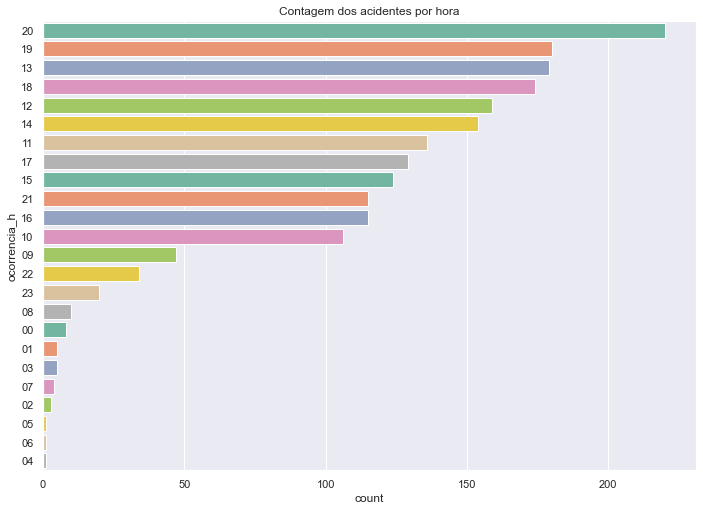

In [8]:
df1['ocorrencia_h'] = df1['ocorrencia_hora'].astype(str).apply(lambda x: x[:2])
print("Frequência no dataset de acidentes aéreos em cada hora do dia:")
print(df1['ocorrencia_h'].value_counts(1)*100)
sns.countplot(y = 'ocorrencia_h', data=df1, palette="Set2", order=df1['ocorrencia_h'].value_counts().index).set_title("Contagem dos acidentes por hora")

Nota-se que as horas que mais concentram acidentes são 20h e 19h. Isso provavelmente é explicado pelo fato de que, nesse período do dia, acontecem muitas viagens e a visibilidade já está prejudicada, uma vez que não há mais a luz do sol para iluminar. O alto número de casos às 18h provavelmente tem a mesma explicação.

Frequência no dataset de acidentes aéreos em cada período do dia:
Tarde        44.559585
Noite        38.497409
Manhã        15.751295
Madrugada     1.191710
Name: periodo, dtype: float64


Text(0.5, 1.0, 'Contagem dos acidentes por período do dia')

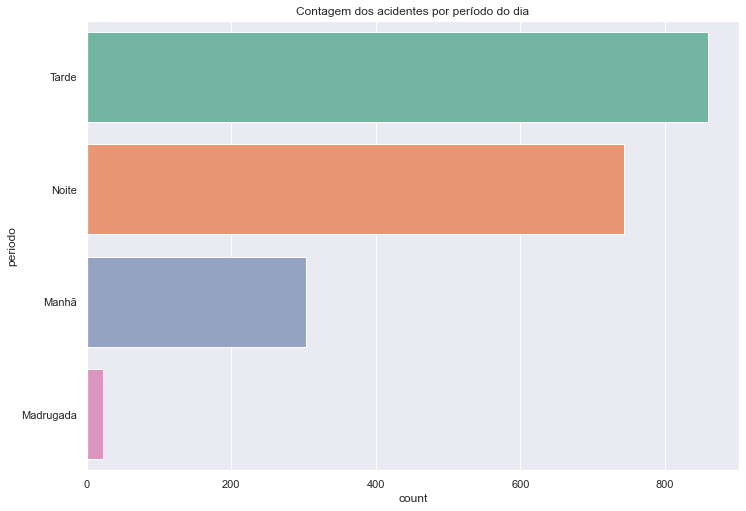

In [9]:
def periodos(x):
    try:
        x = int(x)
    except:
        x = float("inf")
    if (x >= 6) and (x < 12):
        return "Manhã"
    elif (x >= 12) and (x < 18):
        return "Tarde"
    elif (x >= 18) and (x < 24):
        return "Noite"
    elif (x >= 0) and (x <6):
        return "Madrugada"
    else:
        return None
df1['periodo'] = df1['ocorrencia_h'].apply(periodos)
print("Frequência no dataset de acidentes aéreos em cada período do dia:")
print(df1['periodo'].value_counts(1)*100)
sns.countplot(y = 'periodo', data=df1, palette="Set2").set_title("Contagem dos acidentes por período do dia")

A tarde e a noite concentram aa maior parte dos acidentes (83%). Na madrugada ocorrem poucos acidentes, provavelmente devido à baixa quantidade de voos que ocorrem nesse período.

### Em quais estados do Brasil ocorrem mais acidentes?

Frequência no dataset de acidentes aéreos em cada unidade da federação:
SP     21.036269
MT      9.222798
RS      8.808290
PR      7.979275
MG      7.927461
GO      7.150259
PA      6.943005
MS      4.404145
RJ      3.886010
AM      3.626943
BA      3.523316
SC      3.471503
RR      1.813472
MA      1.658031
CE      1.191710
TO      1.139896
PE      1.088083
RO      0.777202
PI      0.777202
AC      0.725389
ES      0.725389
DF      0.466321
SE      0.466321
PB      0.414508
AP      0.259067
RN      0.207254
AL      0.207254
***     0.103627
Name: ocorrencia_uf, dtype: float64


Text(0.5, 1.0, 'Contagem dos acidentes por unidade da federação')

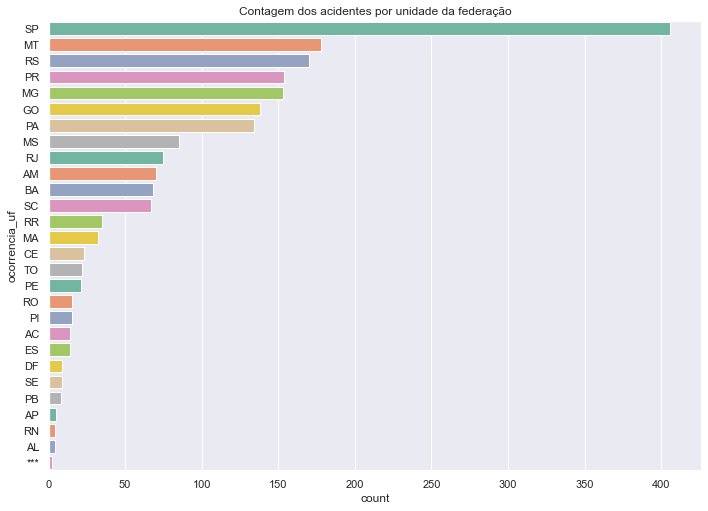

In [10]:
print("Frequência no dataset de acidentes aéreos em cada unidade da federação:")
print(df1['ocorrencia_uf'].value_counts(1)*100)
sns.countplot(y = 'ocorrencia_uf', data=df1, palette="Set2", order=df1['ocorrencia_uf'].value_counts().index).set_title("Contagem dos acidentes por unidade da federação")

São Paulo é o estado brasileiro em que mais ocorrem acidentes áereos. Provavelmente, a explicação para esse fenômeno é o fato de que este é o estado mais rico do país e, consequentemente, onde ocorrem mais viagens de avião.
Vale notar que São Paulo registrou mais que o dobro de acidentes que o segundo colocado, Mato Grosso.

### Como tem sido a evolução do número de casos de acidente aéreo ao longo do anos?

In [11]:
df1['ocorrencia_ano'] = df1['ocorrencia_dia'].apply(lambda x: int(x[-4:]))

Frequência no dataset de acidentes aéreos por ano desde 2010:
2012    10.673575
2013    10.310881
2011     9.689119
2014     9.119171
2015     8.911917
2018     8.497409
2016     8.445596
2020     7.772021
2019     7.720207
2017     7.512953
2010     6.683938
2021     4.663212
Name: ocorrencia_ano, dtype: float64


Text(0.5, 1.0, 'Número de acidentes aéreos por ano desde 2010')

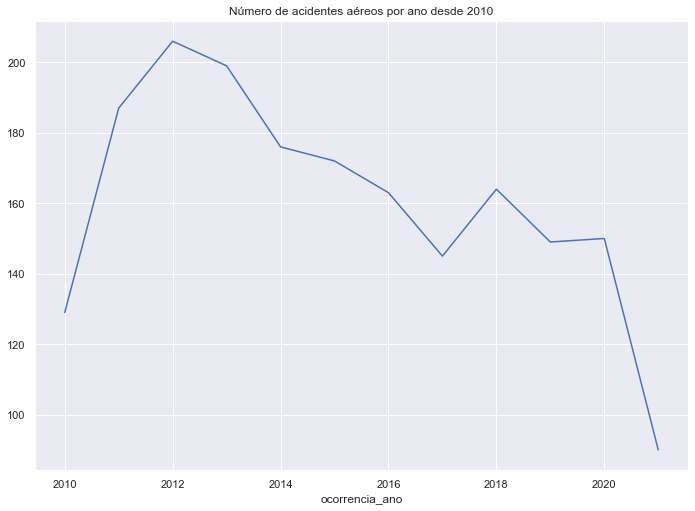

In [12]:
print("Frequência no dataset de acidentes aéreos por ano desde 2010:")
print(df1['ocorrencia_ano'].value_counts(1)*100)
anos = df1.groupby("ocorrencia_ano").count().iloc[:, 0]
sns.lineplot(x=anos.index, y=anos.values).set_title("Número de acidentes aéreos por ano desde 2010")

2012 foi o ano com mais acidentes aéreos da última década, seguido por 2013 e 2011

### Normalmente, quantas aeronaves estão envolvidas nos acidentes?

In [13]:
print("Frequência no dataset de acidentes aéreos com uma e duas aeronaves")
df1['total_aeronaves_envolvidas'].value_counts(1)*100

Frequência no dataset de acidentes aéreos com uma e duas aeronaves


1    99.326425
2     0.673575
Name: total_aeronaves_envolvidas, dtype: float64

Nota-se que, na esmagadora maioria dos acidentes aéreos (99,33%), apenas uma aeronave esteve envolvida 

### Quais os tipos mais frequentes de acidentes aéreos?

Para analisar os tipos de acidentes, é necessário utilizar outro CSV disponibilizado na base CENIPA. Vamos ler o dataset e depois fazer um merge para juntá-lo à base principal. Depois disso, vamos descartar as colunas que não serão utilizadas.

In [14]:
df_tipo = pd.read_csv("ocorrencia_tipo.csv", sep=';')
df2 = df1.merge(df_tipo, left_on="codigo_ocorrencia", right_on="codigo_ocorrencia1", how='left')
df2.drop(['codigo_ocorrencia1', 'taxonomia_tipo_icao', 'ocorrencia_tipo_categoria'], axis=1, inplace=True)
print(df2.shape[0] - df1.shape[0])

96


Ao juntar os datasets, nota-se que algumas linhas (96) foram adicionadas. Isso acontece, pois alguns acidentes envolveram mais de um tipo de ocorrência

In [15]:
print('20 tipos de ocorrência mais frequentes em acidentes aéreos e sua proporção em relacão ao total:')
df2['ocorrencia_tipo'].value_counts(1).head(20)*100

20 tipos de ocorrência mais frequentes em acidentes aéreos e sua proporção em relacão ao total:


FALHA DO MOTOR EM VOO                                 18.953603
PERDA DE CONTROLE EM VOO                              18.114511
PERDA DE CONTROLE NO SOLO                             11.648569
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO      6.465943
INDETERMINADO                                          5.873643
EXCURSÃO DE PISTA                                      4.590326
PANE SECA                                              3.948667
COM TREM DE POUSO                                      3.158934
OPERAÇÃO A BAIXA ALTITUDE                              3.109576
OUTROS                                                 3.010859
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE     2.467917
POUSO BRUSCO                                           2.023692
VOO CONTROLADO CONTRA O TERRENO                        1.875617
POUSO LONGO                                            1.826259
POUSO SEM TREM                                         1.480750
POUSO EM LOCAL NÃO PREVISTO             

A causa de acidentes aéreos mais comum é a falha do motor durante o voo, seguida de perto pela perda de controle no voo e pela perda de controle no solo

In [16]:
df2['tipo_pouso'] = df2['ocorrencia_tipo'].apply(lambda x: 1 if 'POUSO' in x else 0)
df2['tipo_voo'] = df2['ocorrencia_tipo'].apply(lambda x: 1 if 'VOO' in x else 0)
df2['tipo_decolagem'] = df2['ocorrencia_tipo'].apply(lambda x: 1 if 'DECOLAGEM' in x else 0)
df2.iloc[:, -3:].sum()/len(df2)*100

tipo_pouso        16.979269
tipo_voo          41.609082
tipo_decolagem     6.465943
dtype: float64

Vale notar que em 41,61% dos acidentes a causa está relacionada a algo que ocorreu durante o voo. Em 16,98% dos acidentes, a ocorrência tinha relacão com o pouso da aeronave, e 6,47% dos acidentes aconteceram durante a decolagem. Isso não significa que esses valores correspondem à fase do voo em que o acidente ocorreu, já que aqui estamos analisando o tipo de acidente, não a fase de operação da aeronave

### Qual o tipo de aeronave que mais se envolve em acidentes?

Para analisar as aeronaves envolvidas em acidentes, é necessário utilizar outro CSV disponibilizado na base CENIPA. Vamos ler o dataset, descartar as colunas que não serão utilizadas e depois fazer um merge para juntá-lo à base principal,

In [17]:
df_aeronave = pd.read_csv("aeronave.csv", sep=';')
df_aeronave = df_aeronave[['aeronave_tipo_veiculo', 'aeronave_ano_fabricacao', 'aeronave_nivel_dano',
                           'aeronave_fatalidades_total', 'aeronave_fase_operacao', 'aeronave_tipo_operacao',
                           "codigo_ocorrencia2"]]
df3 = df1.merge(df_aeronave, left_on="codigo_ocorrencia", right_on="codigo_ocorrencia2", how='left')
df3.drop('codigo_ocorrencia2', axis=1, inplace=True)

print(df3.shape[0] - df1.shape[0])

13


Ao juntar os datasets, nota-se que algumas linhas (13) foram adicionadas. Isso acontece, pois alguns acidentes envolveram mais de um tipo de aeronave

Tipos de aeronaves envolvidas em acidentes aéreos e sua proporção em relacão ao total:
AVIÃO          71.744725
ULTRALEVE      12.454967
HELICÓPTERO    12.146166
***             2.264539
PLANADOR        0.720535
ANFÍBIO         0.360268
TRIKE           0.257334
BALÃO           0.051467
Name: aeronave_tipo_veiculo, dtype: float64


Text(0.5, 1.0, 'Tipo das aeronaves envolvidas em acidentes')

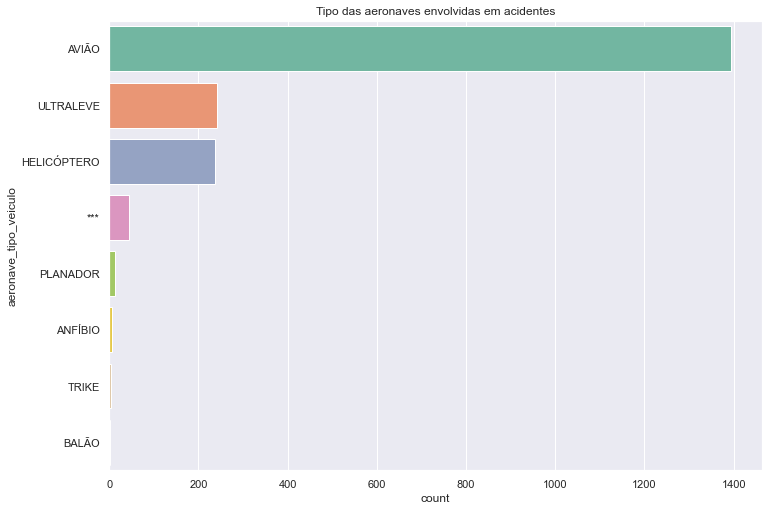

In [18]:
print('Tipos de aeronaves envolvidas em acidentes aéreos e sua proporção em relacão ao total:')
print(df3['aeronave_tipo_veiculo'].value_counts(1).head(10)*100)
sns.countplot(y = 'aeronave_tipo_veiculo', data=df3, palette="Set2", order=df3['aeronave_tipo_veiculo'].value_counts().index).set_title("Tipo das aeronaves envolvidas em acidentes")

A grande maioria (71,75%) dos acidentes aéreos no brasil acontece com aviões

### Qual o tipo de operação mais frequente entre as aeronaves envolvidas em acidentes desde 2010?

Tipo de operação das aeronaves envolvidas em acidente e sua proporção em relação ao total
PRIVADA          44.004117
AGRÍCOLA         21.204323
INSTRUÇÃO        12.506433
EXPERIMENTAL      9.933093
TÁXI AÉREO        6.639218
POLICIAL          1.749871
ESPECIALIZADA     1.338137
***               1.183736
REGULAR           0.926402
NÃO REGULAR       0.514668
Name: aeronave_tipo_operacao, dtype: float64


Text(0.5, 1.0, 'Tipo de operação das aeronaves envolvidas em acidentes')

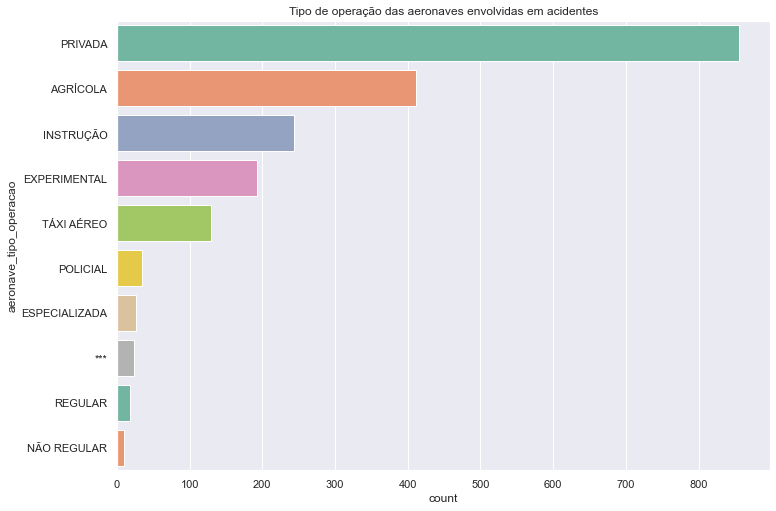

In [19]:
print('Tipo de operação das aeronaves envolvidas em acidente e sua proporção em relação ao total')
print(df3['aeronave_tipo_operacao'].value_counts(1).head(10)*100)
sns.countplot(y = 'aeronave_tipo_operacao', data=df3, palette="Set2", order=df3['aeronave_tipo_operacao'].value_counts().index).set_title("Tipo de operação das aeronaves envolvidas em acidentes")

O tipo de operação mais frequente entre aeronaves envolvidas em acidente é o particular, com 44% das ocorrências, seguido do agrícola, com 21,2%

### Quando as aeronaves envolvidas em acidente foram fabricadas?

Frequência no dataset de acidentes aéreos por ano desde 2010:


Text(0.5, 1.0, 'Ano de fabricação de aeronaves envolvidas em acidentes')

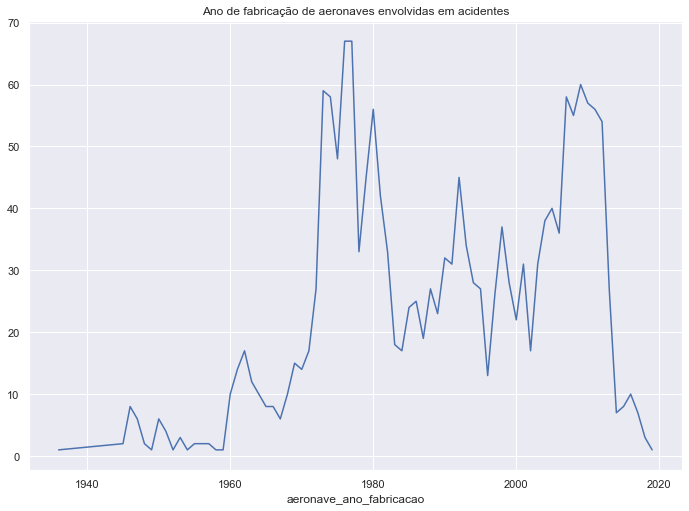

In [20]:
print("Frequência no dataset de acidentes aéreos por ano desde 2010:")
anos_fabricacao = df3.groupby("aeronave_ano_fabricacao").count().iloc[:, 0]
anos_fabricacao.drop(0, inplace=True)
sns.lineplot(x=anos_fabricacao.index, y=anos_fabricacao.values).set_title("Ano de fabricação de aeronaves envolvidas em acidentes")

Década de fabricação das aeronaves envolvidas em acidentes e sua proporção em relacão ao total:
1970.0    22.918862
2000.0    20.442571
1990.0    15.858799
1980.0    14.963119
2010.0    12.118019
1960.0     5.795574
0.0        5.742887
1950.0     1.106428
1940.0     1.001054
1930.0     0.052687
Name: decada_fabricacao, dtype: float64


Text(0.5, 1.0, 'Década de fabricação de aeronaves envolvidas em acidentes')

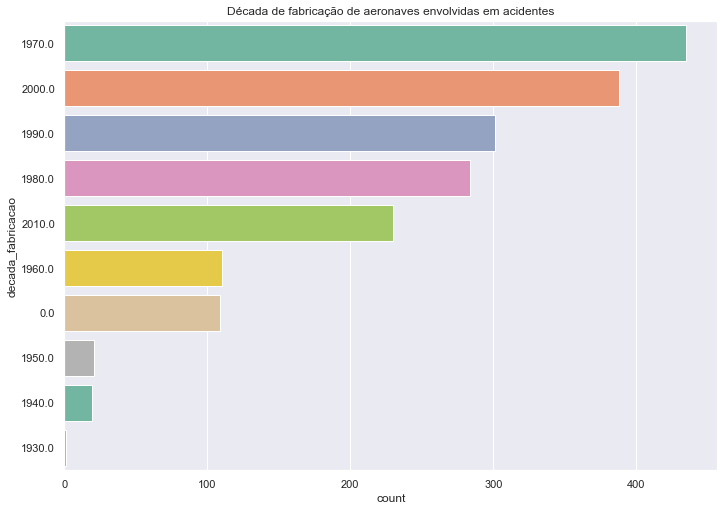

In [21]:
df3["decada_fabricacao"] = df3['aeronave_ano_fabricacao'].apply(lambda x: x - (x%10))
print('Década de fabricação das aeronaves envolvidas em acidentes e sua proporção em relacão ao total:')
print(df3['decada_fabricacao'].value_counts(1).head(10)*100)
sns.countplot(y = 'decada_fabricacao', data=df3, palette="Set2", order=df3['decada_fabricacao'].value_counts().index).set_title("Década de fabricação de aeronaves envolvidas em acidentes")

A década de 70 é a que mais concentra a data de fabricação de aeronaves envolvidas em acidentes no Brasil

### Como se distribuem as idades das aeronaves envolvidas em acidentes?

count    1789.000000
mean       25.247065
std        16.266289
min         0.000000
25%        10.000000
50%        25.000000
75%        38.000000
max        79.000000
Name: idade_aeronave, dtype: float64


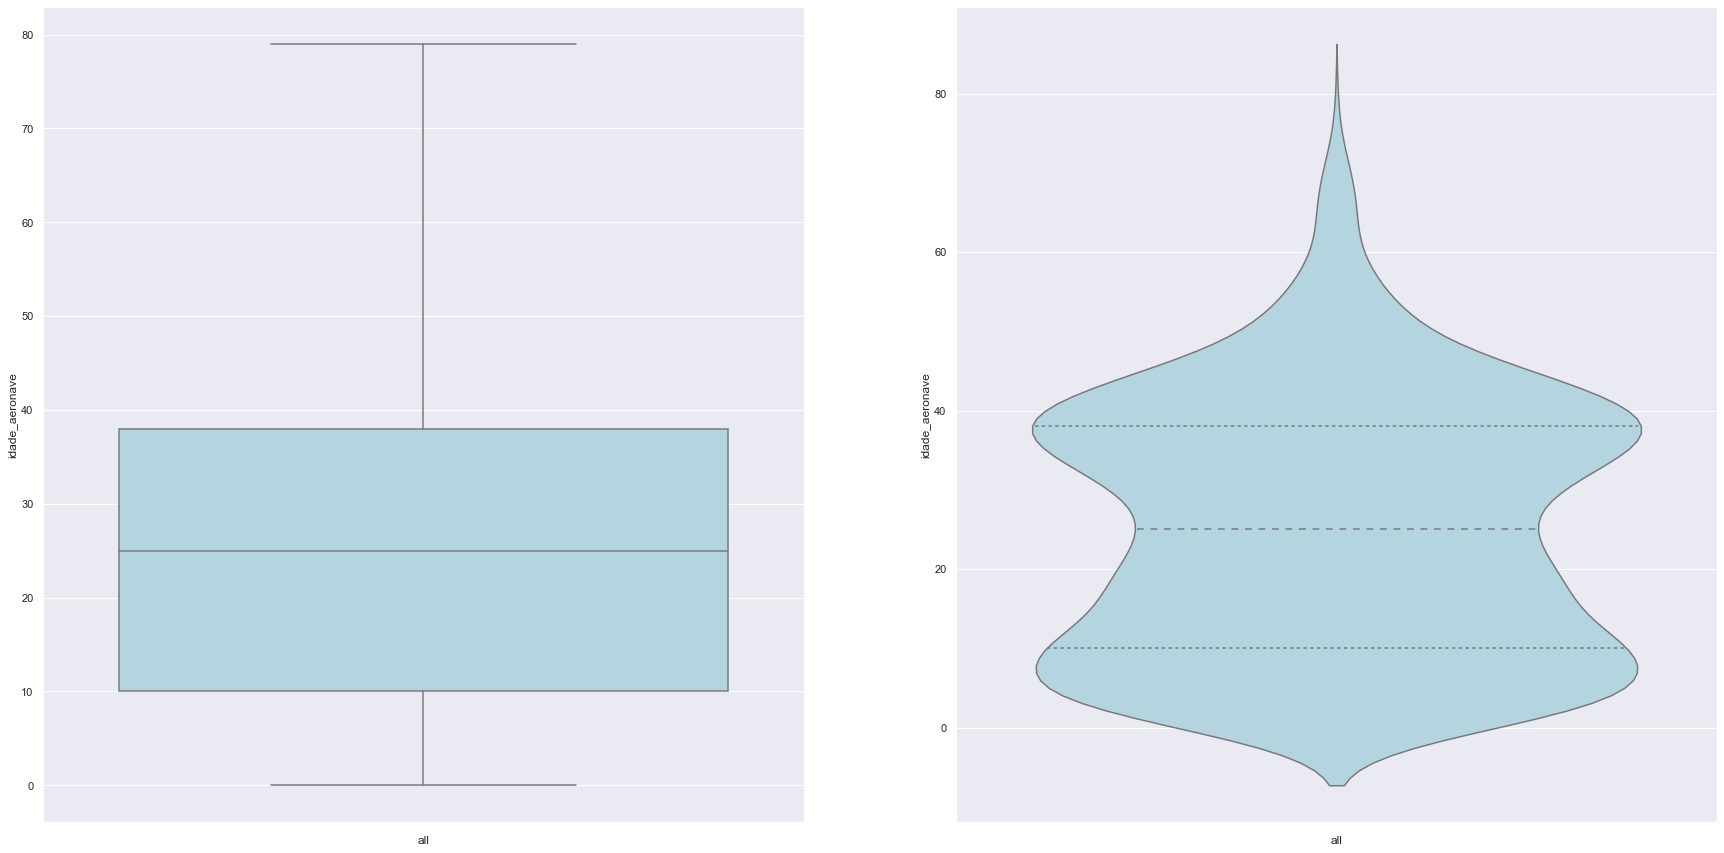

In [22]:
df3['idade_aeronave'] = df3["ocorrencia_ano"] - df3['aeronave_ano_fabricacao']
df3['idade_aeronave'] = df3['idade_aeronave'].apply(lambda x: float("nan") if x > 100 else x)
df3['all'] = ""
fig, ax = plt.subplots(1,2)
fig.set_size_inches(30, 15)
sns.boxplot(data=df3, x="all", y='idade_aeronave', ax=ax[0], color="lightblue")
sns.violinplot(data=df3, x="all", y='idade_aeronave', ax=ax[1], inner="quartile", color="lightblue")
print(df3['idade_aeronave'].describe())

Observando as idades das aeronaves envolvidas em acidentes, nota-se que em média elas têm 25 anos na data da ocorrência. Apenas 25% das aeronaves envolvidas em acidentes tinha menos que 10 anos de idade.

Também é possível perceber uma grande concentração de aeronaves de cerca de 40 anos de idade entre as acidentadas, o que vai ao encontro da conclusão destacada anteriormente, segundo a qual a maioria das aeronaves envolvidas nessas ocorrência foi fabricada na década de 1970.

### Em que fase de operação estava a aeronave no momento do acidente?

Fase de operação aeronaves envolvidas em acidentes aéreos e sua proporção em relacão ao total:
DECOLAGEM              20.020587
POUSO                  15.697375
CRUZEIRO               14.770973
MANOBRA                 8.234689
CORRIDA APÓS POUSO      7.668554
ESPECIALIZADA           6.793618
APROXIMAÇÃO FINAL       3.860010
SUBIDA                  3.654143
INDETERMINADA           3.345342
CIRCUITO DE TRÁFEGO     2.521873
Name: aeronave_fase_operacao, dtype: float64


Text(0.5, 1.0, 'Fase de operação das aeronaves envolvidas em acidentes')

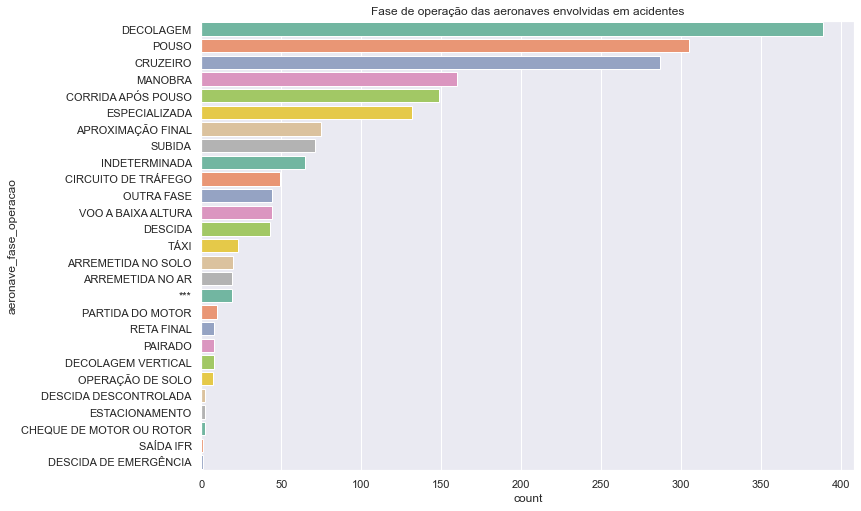

In [23]:
print('Fase de operação aeronaves envolvidas em acidentes aéreos e sua proporção em relacão ao total:')
print(df3['aeronave_fase_operacao'].value_counts(1).head(10)*100)
sns.countplot(y = 'aeronave_fase_operacao', data=df3, palette="Set2", order=df3['aeronave_fase_operacao'].value_counts().index).set_title("Fase de operação das aeronaves envolvidas em acidentes")

A decolagem é a fase de operação em que mais acidentes acontecem, seguida pelo pouso. No total, mais de 20% das aeronaves estavam decolando quando se acidentaram

### As aeronaves sofrem muito dano em decorrência dos acidentes?

Nível de dano em aeronaves envolvidas em acidentes aéreos e sua proporção em relacão ao total:
SUBSTANCIAL    75.090067
DESTRUÍDA      18.939784
LEVE            2.779207
***             1.749871
NENHUM          1.441071
Name: aeronave_nivel_dano, dtype: float64


Text(0.5, 1.0, "'Nível de dano em aeronaves envolvidas em acidentes")

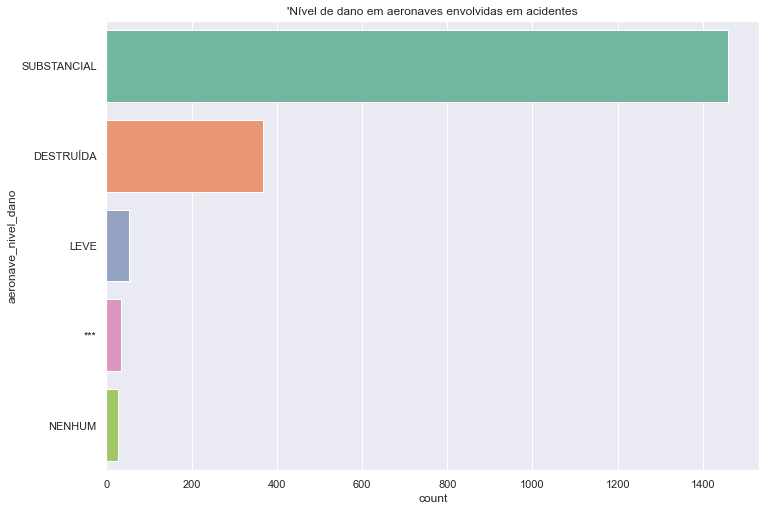

In [24]:
print('Nível de dano em aeronaves envolvidas em acidentes aéreos e sua proporção em relacão ao total:')
print(df3['aeronave_nivel_dano'].value_counts(1).head(10)*100)
sns.countplot(y = 'aeronave_nivel_dano', data=df3, palette="Set2", order=df3['aeronave_nivel_dano'].value_counts().index).set_title("'Nível de dano em aeronaves envolvidas em acidentes")

Mais de 3/4 das aeronaves envolvidas em acidentes tiveram dano substancial decorrente do sucedido. Quase 19% delas foram totalmente destruídas

### Os acidentes de aeronaves resultaram em mortes? Quantas?

Para sabermos quantas foram as fatalidades que resultaram de cada acidente aéreo, é necessário agrupar o dataset por código de ocorrência, já que no dataset criado há mais de uma aeronave envolvida no acidente e, potanto, mais de uma linha referente ao mesmo acidente

In [25]:
df4 = df3[['codigo_ocorrencia','aeronave_fatalidades_total']]
df4 = df4.groupby('codigo_ocorrencia').sum()

Número de mortes em acidentes de aeronaves:
0       76.476684
1       11.917098
2        6.580311
>= 3     5.025907
Name: aeronave_fatalidades, dtype: float64


Text(0.5, 1.0, 'Número de fatalidades nos acidentes de aeronaves')

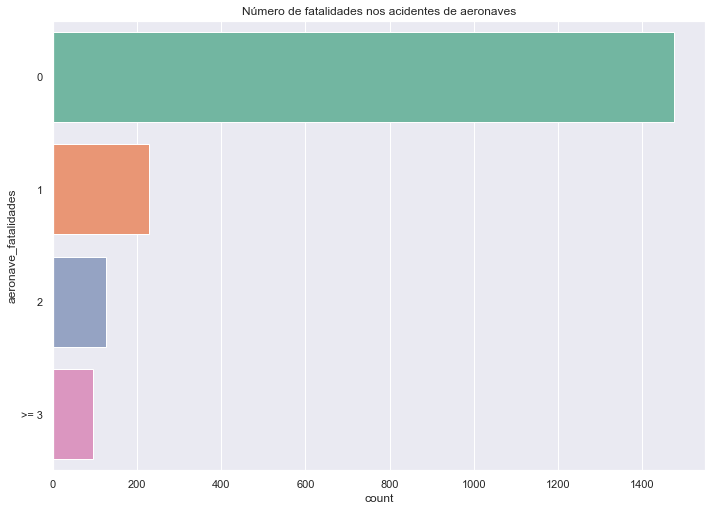

In [26]:
print('Número de mortes em acidentes de aeronaves:')
df4['aeronave_fatalidades'] = df4['aeronave_fatalidades_total'].apply(lambda x: ">= 3" if x >= 3 else str(x))
print(df4['aeronave_fatalidades'].value_counts(1).head(10)*100)
sns.countplot(y = 'aeronave_fatalidades', data=df4, palette="Set2", order=df4['aeronave_fatalidades'].value_counts().index).set_title("Número de fatalidades nos acidentes de aeronaves")

Em 76,5% dos acidentes aéreos do Brasil, não houve nenhuma fatalidade. Em 11,9% deles, houve uma fatalidade e em apenas 5% houve mais de três fatalidades decorrentes do acidente

In [27]:
df4['aeronave_fatalidades_total'].sum()

912

Ao todo 912 pessoas morreram em decorrência dos 1930 acidentes aéreos que ocorreram no Brasil desde 2010